In [28]:
# Assignment 2: Financial Data Analysis for AI Transition Strategy
# IntelliPaat - Executive Post Graduate Certification in Data Science and AI
# Submitted by: Vivek kumar
# Date: March 13, 2025

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Section 1: Problem Statement and Objective
"""
Problem Statement:
Analyze financial data of a fintech firm transitioning to an AI-first strategy to identify actionable insights for operational efficiency and strategic planning.

Objective:
Develop and evaluate data-driven strategies (classification, regression, and clustering) to support the firm's transition to an AI-first approach, focusing on bankruptcy prediction, profit forecasting, and company segmentation.
"""

"\nProblem Statement:\nAnalyze financial data of a fintech firm transitioning to an AI-first strategy to identify actionable insights for operational efficiency and strategic planning.\n\nObjective:\nDevelop and evaluate data-driven strategies (classification, regression, and clustering) to support the firm's transition to an AI-first approach, focusing on bankruptcy prediction, profit forecasting, and company segmentation.\n"

In [31]:
# Section 2: Data Loading and Preprocessing
def preprocess_data(df):
    """Preprocess the financial data by cleaning and handling noise"""
    # Strip whitespace from column names
    df.columns = df.columns.str.strip()
    # Remove duplicates
    df = df.drop_duplicates()
    # Handle missing values with mean imputation
    df = df.fillna(df.mean())
    # Remove outliers using IQR method
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df

# Load the data
df = pd.read_csv('data.csv')  # Upload your CSV file to Colab first
print("Original Data Shape:", df.shape)
df = preprocess_data(df)
print("Processed Data Shape:", df.shape)
print("\nAvailable Columns:", df.columns.tolist())

Original Data Shape: (6819, 96)
Processed Data Shape: (457, 96)

Available Columns: ['Bankrupt?', 'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Operating Expense Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular

In [33]:
# Section 3: Feature Engineering
def feature_engineering(df):
    """Create new features relevant to financial analysis"""
    # Profitability ratio
    df['Profit_Margin_Ratio'] = df['Operating Profit Per Share (Yuan ¥)'] / df['Revenue Per Share (Yuan ¥)']
    # Leverage ratio
    df['Debt_to_Equity'] = df['Total debt/Total net worth'] / df['Net worth/Assets']
    # Composite Return on Assets
    df['ROA_Composite'] = (df['ROA(A) before interest and % after tax'] +
                          df['ROA(B) before interest and depreciation after tax'] +
                          df['ROA(C) before interest and depreciation before interest']) / 3
    # Risk categorization
    df['Risk_Category'] = pd.qcut(df['Net Income to Total Assets'], q=3,
                                 labels=['High', 'Medium', 'Low'])
    return df

df = feature_engineering(df)
print("\nNew Features Added:", [col for col in df.columns if col not in pd.read_csv('data.csv').columns])


New Features Added: ['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Operating Expense Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset 

In [21]:
# Section 4: Strategy Development and Modeling

# Strategy 1: Bankruptcy Classification
def bankruptcy_classification(df):
    """Classify companies at risk of bankruptcy"""
    X = df.drop(['Bankrupt?'], axis=1)
    y = df['Bankrupt?']
    X = X.select_dtypes(include=[np.number])

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    print("\nBankruptcy Classification Report:")
    print(classification_report(y_test, y_pred))

    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    return rf_model, feature_importance

In [22]:
# Strategy 2: Profit Forecasting
def profit_forecasting(df):
    """Forecast operating profit per share"""
    X = df.drop(['Operating Profit Per Share (Yuan ¥)'], axis=1)
    y = df['Operating Profit Per Share (Yuan ¥)']
    X = X.select_dtypes(include=[np.number])

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    y_pred = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nProfit Forecasting Mean Squared Error: {mse}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Profit')
    plt.ylabel('Predicted Profit')
    plt.title('Profit Forecasting: Actual vs Predicted')
    plt.show()

    return lr_model

In [23]:
# Strategy 3: Company Clustering
def company_clustering(df):
    """Cluster companies based on financial characteristics"""
    features = ['ROA_Composite', 'Debt_to_Equity', 'Profit_Margin_Ratio', 'Net Income to Total Assets']
    X = df[features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    df['Cluster'] = clusters

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='ROA_Composite', y='Debt_to_Equity',
                   hue='Cluster', palette='deep')
    plt.title('Company Clusters based on ROA and Debt-to-Equity')
    plt.show()

    return kmeans, df


=== Strategy Execution Results ===

Bankruptcy Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        92

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92


Top 10 Important Features for Bankruptcy Prediction:
                                              feature  importance
0   ROA(C) before interest and depreciation before...         0.0
73                                 Cash Turnover Rate         0.0
71                          Quick Asset Turnover Rate         0.0
70                        Current Asset Turnover Rate         0.0
69                               Total expense/Assets         0.0
68                         Total income/Total expense         0.0
67                  Retained Earnings to Total Assets         0.0
66              Long-term Liability to Current Assets         0.0
65      

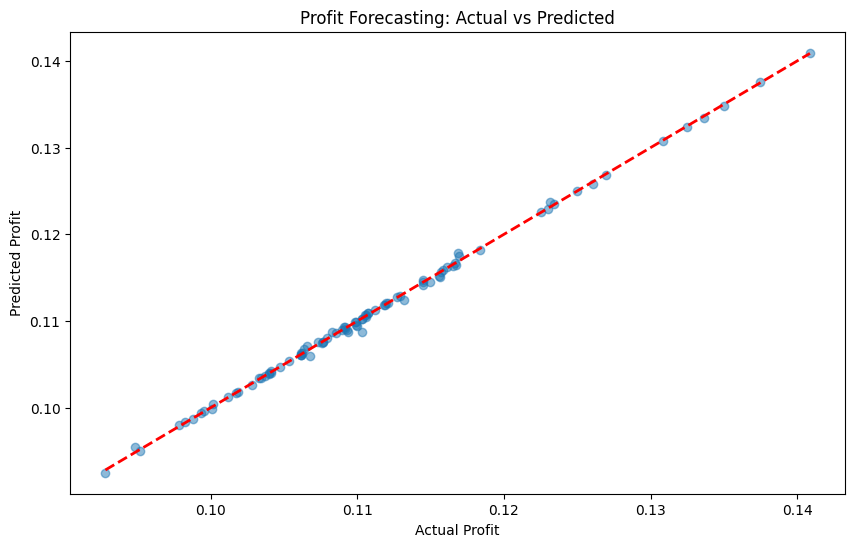

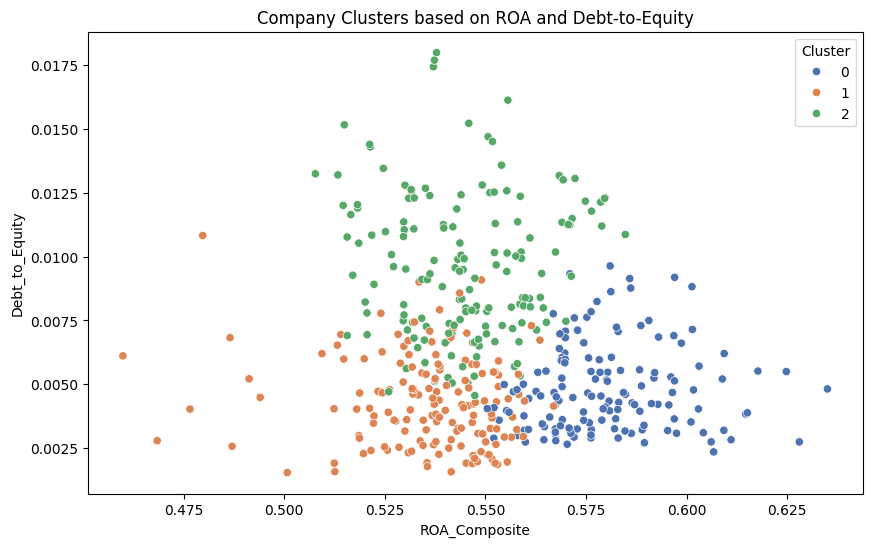

In [24]:
# Section 5: Execution and Results
print("\n=== Strategy Execution Results ===")
model_class, feature_importance = bankruptcy_classification(df)
print("\nTop 10 Important Features for Bankruptcy Prediction:")
print(feature_importance.head(10))

model_profit = profit_forecasting(df)
model_cluster, clustered_df = company_clustering(df)

In [25]:
# Section 6: Action Points for AI Transition
def generate_action_points(feature_importance):
    """Generate actionable insights for AI transition"""
    action_points = {
        'Operational Efficiency': [
            f"Implement AI-driven forecasting focusing on {', '.join(feature_importance['feature'].head(3).tolist())}",
            "Automate bankruptcy risk assessment using classification model",
            "Optimize resource allocation based on cluster profiles"
        ],
        'Technology Integration': [
            "Develop real-time financial monitoring dashboard",
            "Implement automated ML pipeline for model updates",
            "Create AI-based bankruptcy early warning system"
        ],
        'Business Strategy': [
            f"Prioritize improvement of {feature_importance['feature'].iloc[0]} to reduce bankruptcy risk",
            "Develop cluster-specific financial strategies",
            "Implement predictive financial health maintenance"
        ]
    }
    return action_points

action_points = generate_action_points(feature_importance)

In [27]:
# Section 7: Final Report
print("\n=== Assignment Report ===")
print("\n1. Data Preprocessing:")
print("- Removed duplicates and outliers")
print("- Handled missing values with mean imputation")
print(f"- Reduced from {pd.read_csv('data.csv').shape[0]} to {df.shape[0]} rows")

print("\n2. Feature Engineering:")
print("- Added Profit_Margin_Ratio, Debt_to_Equity, ROA_Composite, Risk_Category")
print("- Enhanced dataset for AI-driven analysis")

print("\n3. Strategies Implemented:")
print("- Classification: Random Forest for bankruptcy prediction")
print("- Regression: Linear Regression for profit forecasting")
print("- Clustering: KMeans for company segmentation")

print("\n4. Action Points for AI Transition:")
for category, points in action_points.items():
    print(f"\n{category}:")
    for point in points:
        print(f"- {point}")

print("\n5. Conclusion:")
print("The analysis provides a robust foundation for the fintech firm's AI transition by:")
print("- Identifying key predictors of financial distress")
print("- Enabling profit forecasting for strategic planning")
print("- Segmenting companies for targeted interventions")
print("- Offering concrete AI implementation strategies")


=== Assignment Report ===

1. Data Preprocessing:
- Removed duplicates and outliers
- Handled missing values with mean imputation
- Reduced from 6819 to 457 rows

2. Feature Engineering:
- Added Profit_Margin_Ratio, Debt_to_Equity, ROA_Composite, Risk_Category
- Enhanced dataset for AI-driven analysis

3. Strategies Implemented:
- Classification: Random Forest for bankruptcy prediction
- Regression: Linear Regression for profit forecasting
- Clustering: KMeans for company segmentation

4. Action Points for AI Transition:

Operational Efficiency:
- Implement AI-driven forecasting focusing on ROA(C) before interest and depreciation before interest, Cash Turnover Rate, Quick Asset Turnover Rate
- Automate bankruptcy risk assessment using classification model
- Optimize resource allocation based on cluster profiles

Technology Integration:
- Develop real-time financial monitoring dashboard
- Implement automated ML pipeline for model updates
- Create AI-based bankruptcy early warning syste